In [44]:
import keras
from keras import layers
from keras import models
from keras.datasets import cifar10
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import model_from_json
from keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np
import os

In [45]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

num_classes = 10
# Convert class vectors to binary class matrices.
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=train_images.shape[1:]))
model.add(Activation('relu'))
x = Conv2D(32, (3, 3))
model.add(x)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [46]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

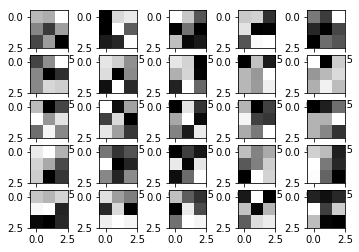

In [47]:
# Weights before training
x1w = x.get_weights()[0][:,:,0,:]
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(x1w[:,:,i],interpolation="nearest",cmap="gray")
plt.show()

In [48]:
# Train weights
if not os.path.isfile("model.h5"):
    model.fit(train_images, train_labels,
              batch_size=32,
              epochs=40,
              validation_data=(test_images, test_labels),
              shuffle=True,
              callbacks=[early_stopping])
    # serialize weights to HDF5
    model.save_weights("model.h5")
    print("Saved model to disk")
else:
    model.load_weights("model.h5")
    print("Loaded model from disk")

Loaded model from disk


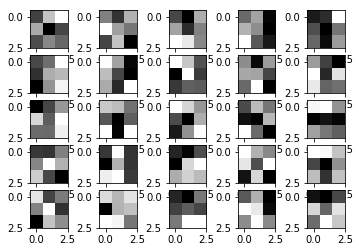

In [49]:
# Weights after training
x1w = x.get_weights()[0][:,:,0,:]
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(x1w[:,:,i],interpolation="nearest",cmap="gray")
plt.show()

In [50]:
# evaluate loaded model on test data
model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
#loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = model.evaluate(train_images, train_labels, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

acc: 82.55%


In [51]:
# Plot of the model (Windows only)
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)